<a href="https://colab.research.google.com/github/Mhsm2012/boton_data_linear_regression/blob/main/supervised_l_earning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 

## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for regression
* Apply inverse transformations to be able to use these in a regression context

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

### Loading in Boston Data

**Note:** See `helper.py` file to see how boston data is read in from SciKit Learn.

In [2]:
from helper import boston_dataframe
boston_data = boston_dataframe()

In [4]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test

#### Visually

Plotting a histogram:

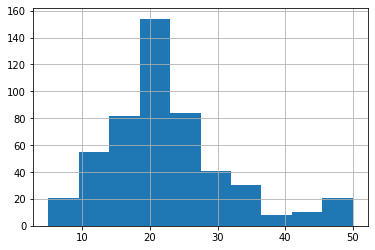

In [5]:
boston_data.MEDV.hist();

Does not look normal due to that right tail. Let's try to verify statistically:

In [46]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [47]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox


### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

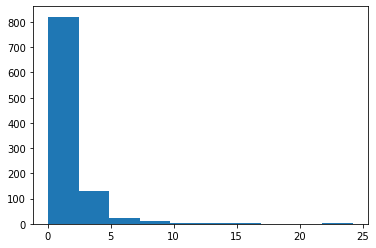

In [48]:
data = plot_exponential_data()

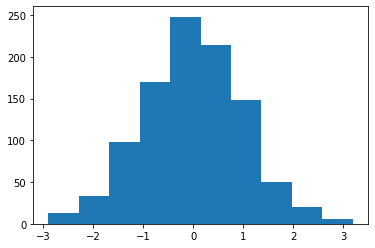

In [49]:
plt.hist(np.log(data));

**Apply transform to Boston data:**

In [10]:
log_medv = np.log(boston_data.MEDV)

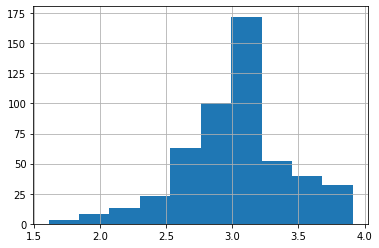

In [11]:
log_medv.hist();

In [12]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

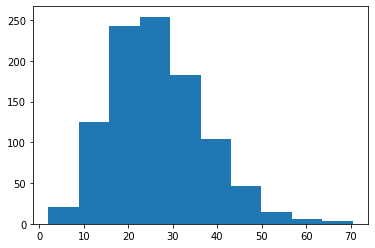

In [13]:
data = plot_square_normal_data()

Slightly skewed right.

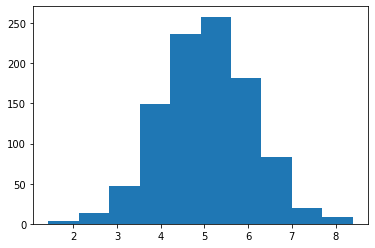

In [14]:
plt.hist(np.sqrt(data));

Apply the square root transformation to the Boston data target and test whether the result is normally distributed.

In [15]:
pass # your code here

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <a list of 10 Patch objects>)

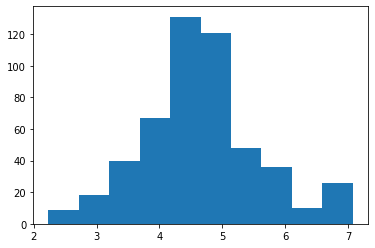

In [16]:
# Instructor Solution

sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [17]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [18]:
from scipy.stats import boxcox

In [19]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [20]:
lam

0.2166209012915364

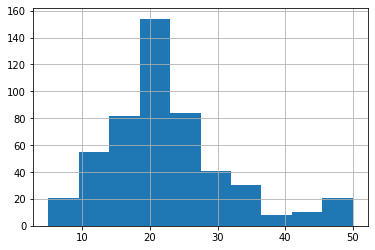

In [21]:
boston_data['MEDV'].hist();

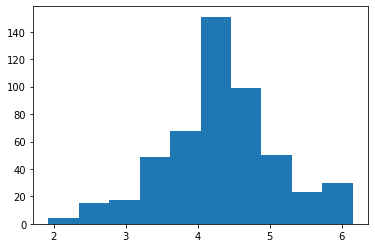

In [22]:
plt.hist(boxcox_medv);

In [23]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [25]:
lr = LinearRegression()

**Reload clean version of `boston_data`:**

In [26]:
boston_data = boston_dataframe()

Same steps as before.

**Create X and y**

In [27]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features**

In [28]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [30]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.

In [31]:
pass # your code here

In [32]:
# Instructor Solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [33]:
y_train_bc.shape

(354,)

In [34]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [39]:
from scipy.special import inv_boxcox

In [40]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [41]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [42]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!

### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Should be two lines of code.

In [43]:
pass # your code here

In [44]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8794001851338568

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [45]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.8555202098064171

---
### Machine Learning Foundation (C) 2020 IBM Corporation